# Лабораторная работа №4
## Тема: Методы сопряженных градиентов

http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D1%81%D0%BE%D0%BF%D1%80%D1%8F%D0%B6%D1%91%D0%BD%D0%BD%D1%8B%D1%85_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2

In [1]:
import sympy as sp
x, y, z, h = sp.symbols('x y z h')

In [2]:
sp.init_printing()

In [3]:
from copy import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [4]:
from pprint import pprint

In [5]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)

#### Условие

In [6]:
def f(x):
    y = x[0]**2 + 2*x[1]**2 + 0.012*x[0]*x[1] - 2*x[0] + x[1]
    return y

#### График функции

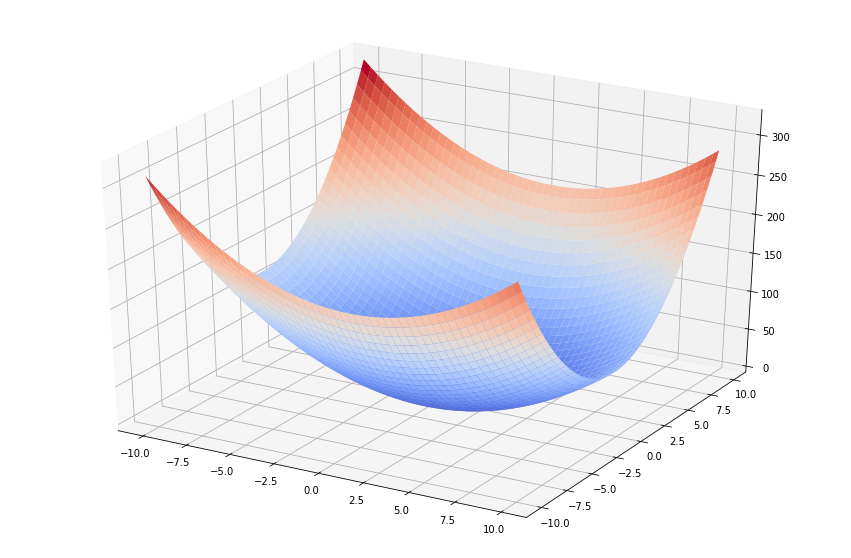

In [7]:
temp = np.arange(-10, 10, 0.1)
a, b = np.meshgrid(temp, temp)
c = f((a, b))

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(a, b, c, cmap=cm.coolwarm)

#### Производные функции

In [8]:
def df(x, h_step=0.01):
    h_matr = h_step * np.eye(x.shape[0])
    y = np.array([(f(x+h) - f(x-h))/(2*h_step) for h in h_matr])
    return y

In [9]:
def d2f(x, h_step=0.01):
    h_matr = h_step * np.eye(x.shape[0])
    y = np.array([(df(x+h, h_step=h_step) - df(x-h, h_step=h_step))/(2*h_step) for h in h_matr])
    return y

#### Функция и ее производные

In [10]:
a = f(np.array([x, y]))
a

In [11]:
b = df(np.array([x, y]), h_step=h)
sp.Matrix([sp.simplify(item) for item in b])

⎡2.0⋅x + 0.012⋅y - 2.0⎤
⎢                     ⎥
⎣0.012⋅x + 4.0⋅y + 1.0⎦

In [12]:
c = d2f(np.array([x, y]), h_step=h)
sp.Matrix([[sp.simplify(item) for item in row]for row in c])

⎡ 2.0   0.012⎤
⎢            ⎥
⎣0.012   4.0 ⎦

#### Метод сопряженных направлений первого порядка

In [13]:
def run(start, error=1e-6):
    x = start
    r = p = -df(start)
    A = d2f(start)
    x_arr = [x]
    
    count = 0
    while True:
        alpha = (r @ r) / (A @ p @ p)
        x_next = x + alpha * p
        r_next = r - alpha * A @ p
        beta = (r_next @ r_next) / (r @ r)
        p_next = r_next + beta * p
        
        if np.linalg.norm(x_next - x) < error:
            break
        
        x = x_next
        r = r_next
        p = p_next
        
        x_arr.append(x)
        count += 1
    return x_arr

####  Демонстрация

In [14]:
size = 10
start_point = 2*size*(np.random.random(2) - 0.5)
e = 1e-6

In [15]:
res = run(start_point, e)

In [16]:
pprint(res)

[array([-5.41587128, -6.35734967]),
 array([-1.80543806,  0.49383917]),
 array([ 1.00151803, -0.25300455])]


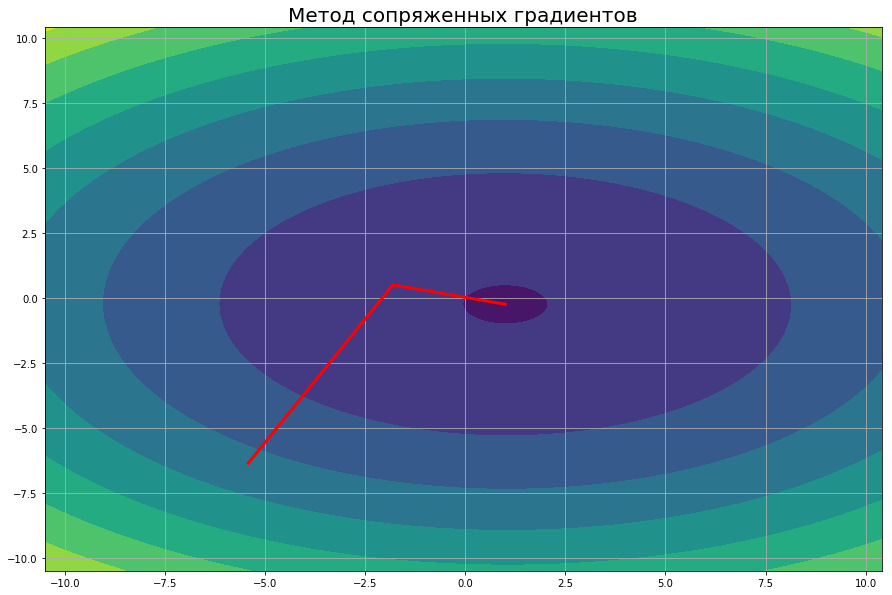

In [17]:
temp = np.arange(-1*size-0.5, size+0.5, 0.1)
a, b = np.meshgrid(temp, temp)
c = f((a, b))
plt.contourf(a, b, c)
plt.grid()
plt.plot([i[0] for i in res], [i[1] for i in res], linewidth=3, color='red')
plt.gca().set_title(f'Метод сопряженных градиентов', fontsize=20)
plt.show()